Found 435 images belonging to 2 classes.
Found 435 images belonging to 2 classes.
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 174s 11s/step - accuracy: 0.5785 - loss: 0.7518 - val_accuracy: 0.6082 - val_loss: 0.5851
Epoch 2/20
 1/13 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.5625 - loss: 0.5831

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.5625 - loss: 0.5831 - val_accuracy: 0.6316 - val_loss: 0.5409
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 185s 10s/step - accuracy: 0.6435 - loss: 0.5642 - val_accuracy: 0.8245 - val_loss: 0.3425
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.8125 - loss: 0.3447 - val_accuracy: 0.6842 - val_loss: 0.3756
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 166s 10s/step - accuracy: 0.8864 - loss: 0.2924 - val_accuracy: 0.9928 - val_loss: 0.0577
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.9688 - loss: 0.0560 - val_accuracy: 1.0000 - val_loss: 0.0436
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 197s 10s/step - accuracy: 0.9746 - loss: 0.0778 - val_accuracy: 0.9904 - val_loss: 0.0266
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 551ms/step - accuracy: 1.0000 - loss: 0.0155 - val_accuracy: 1.0000 - val_loss: 0.0191
Epoch 9/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 154s 9s/step - accuracy: 0.9606 - loss: 0.1270 - val_accuracy: 0.9928 - val_lo

Test accuracy: 0.9839080572128296


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


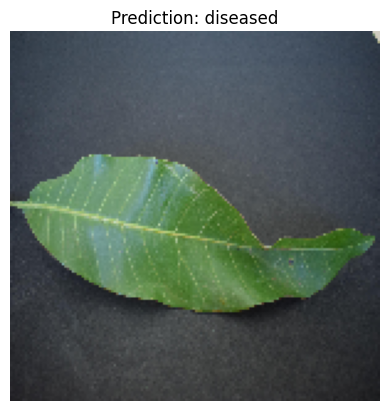

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Set up paths
train_dir = '/content/drive/MyDrive/Mango (P0)'
test_dir = '/content/drive/MyDrive/Mango (P0)'

# Ensure that paths exist and contain subfolders with images
assert os.path.exists(train_dir), "Train directory does not exist!"
assert os.path.exists(test_dir), "Test directory does not exist!"

# Preprocessing the data
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow from directory (assuming 'healthy' and 'diseased' folders exist in the main directory)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Build CNN model
model = Sequential()

# Use Input layer instead of passing input_shape directly to Conv2D
model.add(tf.keras.Input(shape=(150, 150, 3)))

# First Convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Prevent overfitting
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Calculate steps per epoch and validation steps
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# Train the model without using `.repeat()`
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=20,
    validation_data=test_generator,
    validation_steps=validation_steps
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

# Save the model
model.save('/content/drive/MyDrive/Mango (P0)/plant_disease_cnn_model.h5')

# Function to predict the class (diseased or healthy) of an input image
def predict_plant_health(model, img_path):
    # Load the image and preprocess it
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make a prediction using the loaded model
    prediction = model.predict(img_array)

    # Decode the prediction (assuming 0 -> diseased, 1 -> healthy)
    class_names = list(train_generator.class_indices.keys())  # ['diseased', 'healthy']
    predicted_class = class_names[np.argmax(prediction)]

    # Display the result
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_class}")
    plt.axis('off')
    plt.show()

    return predicted_class

# Load the trained model
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Mango (P0)/plant_disease_cnn_model.h5')

# Example usage: predict on a new image
image_path = '/content/drive/MyDrive/Mango (P0)/diseased/0012_0003.JPG'  # Change the path to your test image
predicted_class = predict_plant_health(loaded_model, image_path)
print(f"The plant in the image is predicted to be: {predicted_class}")


import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing import image

# Get true labels and predicted labels
true_labels = []
predicted_labels = []

# Loop through test dataset and make predictions
for i in range(len(test_generator)):
    x, y_true = test_generator[i]  # x contains image batch, y_true contains true labels
    y_pred = model.predict(x)  # Predict using the model

    true_labels.extend(np.argmax(y_true, axis=1))  # Convert one-hot encoded to class index
    predicted_labels.extend(np.argmax(y_pred, axis=1))  # Get index of highest probability

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f'Accuracy: {accuracy:.4f}')

# Precision, Recall, and F1-Score
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')

# Detailed classification report
class_report = classification_report(true_labels, predicted_labels, target_names=list(test_generator.class_indices.keys()))
print("\nClassification Report:\n", class_report)
